In [1]:
#Ava Mehri, UIC, amehri2@uic.edu, 2021
#Image Compressor
#Designed and optimized an image compressor from scratch implementing competitive learning algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.cm as cm

In [3]:
image  = imread('barbara.png') 

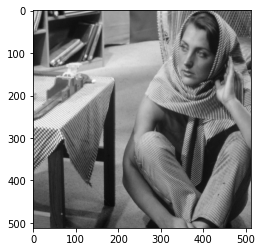

In [4]:
plt.figure()
plt.imshow(image, cmap='gray')

In [5]:
A = np.matrix(image)
A = A - A.min()
A = (255/A.max())*A

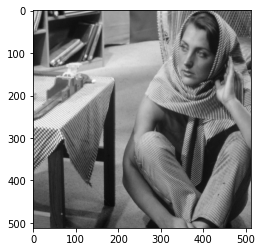

In [6]:
plt.figure()
plt.imshow(A, cmap='gray')

In [7]:
def train(epochs, n, K, A, X):
  A_prime = np.zeros((len(A), len(A)))
  RMS_error = []
  winners = []
  losers = []
  for e in range(epochs):
    # Analaysing the RMS error array, I observed that after 2 epochs it remains constant, meaning that some neurons never win
    # To solve it, after epoch = 2, I reinitialized the weights of those neurons. 
    if e == 3 or e == 5:
      for p in range(K):
        if not p in winners:
          X[p] = A_junior
    for i in range(n):
      for j in range(n):
        ED = []
        A_junior = A[4*i : 4*i+4, 4*j : 4*j+4]
        for k in range(K):
          X[k] = np.matrix(X[k])
          ed = np.sum(np.square(A_junior - X[k]))
          ED.append(ed)
        k_star = np.argmin(ED)
        winners.append(k_star)
        X[k_star] = (1-eta)*X[k_star] + eta*A_junior
        A_prime[4*i : 4*i+4, 4*j : 4*j+4] = X[k_star]
    RMS_error.append((1/len(A))*np.linalg.norm(A_prime - A))
    #RMS_error.append((1/len(A))*np.sqrt(np.sum(np.square(A_prime - A))))
  
  # I used this for loop to verify that losers array would be empty, meaning that all neurons have won at least once.
  # Showing that losers array is empty verifies that my code would defiently return the least RMS. 
  for q in range(K):
    if not q in winners:
      losers.append(q)
  return X, RMS_error, losers

In [8]:
def test(n, K, A, X):
  A_prime = np.zeros((len(A), len(A)))
  for i in range(n):
    for j in range(n):
      ED = []
      A_junior = A[4*i : 4*i+4, 4*j : 4*j+4]
      for k in range(K):
        X[k] = np.matrix(X[k])
        ed = np.sum(np.square(A_junior - X[k]))
        ED.append(ed)
      k_star = np.argmin(ED)
      A_prime[4*i : 4*i+4, 4*j : 4*j+4] = X[k_star]

  RMS_error = (1/len(A))*np.linalg.norm(A_prime - A)
  #RMS_error = (1/len(A))*np.sqrt(np.sum(np.square(A_prime - A)))
  return A_prime, RMS_error

Training RMS error after each epoch = [12.313628379985238, 11.393341418510262, 11.393341418510262, 11.129571965111326, 11.127753097320737, 11.127753097320737, 11.127753097320737, 11.127753097320737, 11.127753097320737, 11.127753097320737]
Loser neurons = []
Test RMS error = 29.86446139269017


Text(0.5, 1.0, 'Compressed image for K = 8')

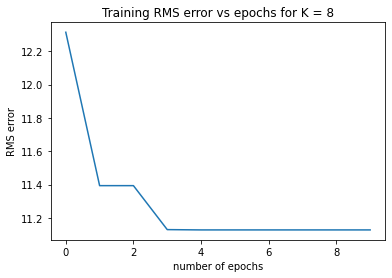

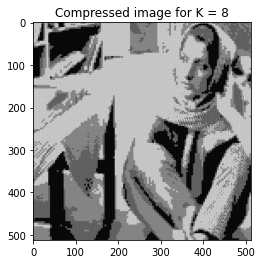

In [9]:
d = 4
K = 8
n = int(len(A)/d)
eta = 0.5
epochs = 10

X = np.random.uniform(0, 255, size=(1,K*d*d))
X = X.reshape(K,d,d)
#X = A.T

X_star, RMS_error_train, losers = train(epochs, n, K, A, X)
A_prime, RMS_error_test = test(n, K, A, X_star)

print(f'Training RMS error after each epoch = {RMS_error_train}\nLoser neurons = {losers}')
plt.figure()
plt.plot(RMS_error_train)
plt.xlabel('number of epochs')
plt.ylabel('RMS error')
plt.title(f'Training RMS error vs epochs for K = {K}')

print(f'Test RMS error = {RMS_error_test}')
plt.figure()
plt.imshow(A_prime, cmap='gray')
plt.title(f'Compressed image for K = {K}')

Training RMS error for K = 2 after each epoch = [14.832037759736341, 14.827402094935293, 14.827402094935293, 14.827402094935293, 14.827402094935293, 14.827402094935293, 14.827402094935293, 14.827402094935293, 14.827402094935293, 14.827402094935293]
Loser neurons = []
Test RMS error (for K = 2) = 54.122570407368194
Training RMS error for K = 8 after each epoch = [12.11421627980411, 11.69779892405124, 11.69779892405124, 11.108781941167125, 11.127753097320737, 11.127753097320737, 11.127753097320737, 11.127753097320737, 11.127753097320737, 11.127753097320737]
Loser neurons = []
Test RMS error (for K = 8) = 29.86446139269017
Training RMS error for K = 32 after each epoch = [11.372935611633924, 10.691962836985585, 10.541050096841786, 8.64805700764274, 8.898598110541585, 8.830155920737507, 8.835603598147296, 8.889661221402465, 8.909619934661183, 8.835042595574166]
Loser neurons = []
Test RMS error (for K = 32) = 27.604557970803675


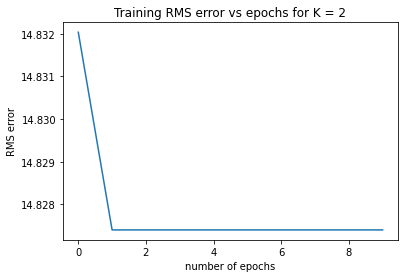

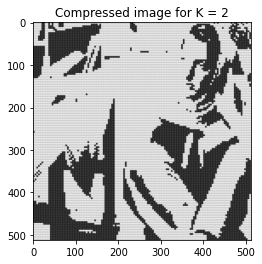

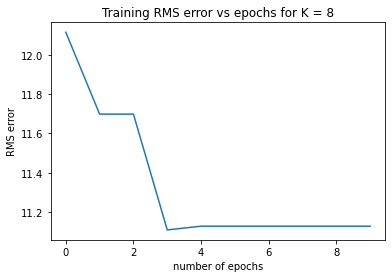

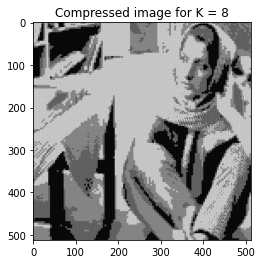

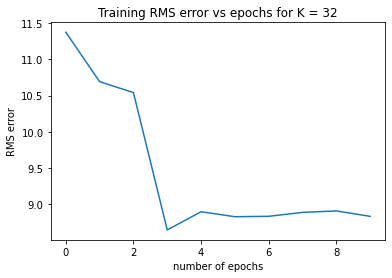

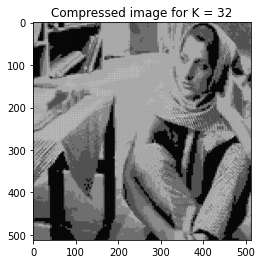

In [10]:
d = 4
K = [2, 8, 32]
n = int(len(A)/d)
eta = 0.5
epochs = 10

for k in K:
  X = np.random.uniform(0, 255, size=(1,k*d*d))
  X = X.reshape(k,d,d)

  X_star, RMS_error_train, losers = train(epochs, n, k, A, X)
  A_prime, RMS_error_test = test(n, k, A, X_star)

  print(f'Training RMS error for K = {k} after each epoch = {RMS_error_train}\nLoser neurons = {losers}')
  plt.figure()
  plt.plot(RMS_error_train)
  plt.xlabel('number of epochs')
  plt.ylabel('RMS error')
  plt.title(f'Training RMS error vs epochs for K = {k}')

  print(f'Test RMS error (for K = {k}) = {RMS_error_test}')
  plt.figure()
  plt.imshow(A_prime, cmap='gray')
  plt.title(f'Compressed image for K = {k}')